<a href="https://colab.research.google.com/github/KathNeus/Birdsongs_DeepLearning_TechLab_2024/blob/main/AIO_Birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Initialize Runtime

In [ ]:
#Die Zellen die ausgeführt werden müssen sind
# 1. Initiliaze Runtime
# 2. Create the Spectrograms
# 3. Apply Augmentations (könnte man streichen da deaktiviert)
# 4. Initialize DataLoaders
# 5. Select Model (Eins auswählen)
# 6. Training

#!pip install tqdm
#!pip install torchaudio matplotlib librosa

from google.colab import drive
drive.mount('/content/drive')
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from collections import Counter

import re

def extract_wav_filename(filepath):
    # Define the regex pattern to extract the filename
    pattern = r'([^\\/]+)\.wav$'

    # Search for the pattern in the filepath
    match = re.search(pattern, filepath)

    # Return the matched filename or None if no match is found
    if match:
        return match.group(1)
    else:
        return None

try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

min_freq=1024
max_freq=8192

def get_sizeGB(start_path = '.'):
    total_size = 0
    filecount=0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
                filecount +=1
    return total_size/(10**9),filecount

ValueError: mount failed

In [ ]:

a,b=get_sizeGB("/content/drive/MyDrive/spectrograms")
print(a, 'Gbytes; ',b,'files')

76.791063188 Gbytes;  2724 files


## Spectrogram Test

00GreatTit 256


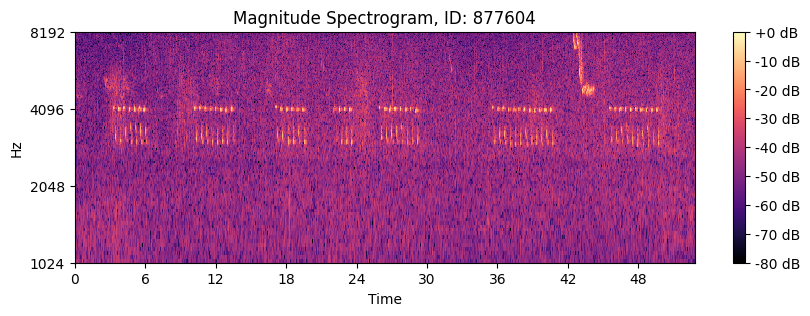

KeyboardInterrupt: 

In [ ]:
min_freq=1024
max_freq=8192

sampledict={}
unique_frq=set()
i=0
for folder in next(os.walk('/content/drive/MyDrive/xenoDL/'))[1]:
  if not folder.startswith('.'):
    print(folder+' '+str(len(os.listdir('/content/drive/MyDrive/xenoDL/'+folder+'/'))))
    #wavfiles=[]
    for file in glob.glob("/content/drive/MyDrive/xenoDL/"+folder+"/*.wav"):
     y, sr = librosa.load(file, sr=44100)
     sampledict[file]=sr
     unique_frq.add(sr)
     D = librosa.stft(y, n_fft=1024, hop_length=512)
     # Convert the complex-valued STFT result to a magnitude spectrogram
     magnitude_spectrogram = np.abs(D)
     # Get the corresponding frequency bins
     frequencies = librosa.fft_frequencies(sr=sr, n_fft=1024)

# Find the frequency bin indices for the desired range
     min_bin = np.argmax(frequencies >= min_freq)
     max_bin = np.argmax(frequencies > max_freq)
     magnitude_spectrogram[:min_bin, :]=0
     magnitude_spectrogram[max_bin:, :]=0


# Convert the filtered magnitude spectrogram to dB scale
     dB_spectrogram = librosa.amplitude_to_db( magnitude_spectrogram, ref=np.max)
# Plot the spectrogram
     plt.figure(figsize=(10, 3))
     librosa.display.specshow(dB_spectrogram, sr=sr,hop_length=512, x_axis='time', y_axis='log', fmin=min_freq, fmax=max_freq)
     plt.colorbar(format='%+2.0f dB')
     plt.title('Magnitude Spectrogram, ID: '+extract_wav_filename(file))
     plt.ylim(min_freq, max_freq)
     plt.show()
     i+=1
     if i>0:
      break
    if i>0:
      break

#occurrences = count_occurrences(dataset, unique_frq)

#print(occurrences)



Sample rate: 48000
Audio duration: 72.58 seconds


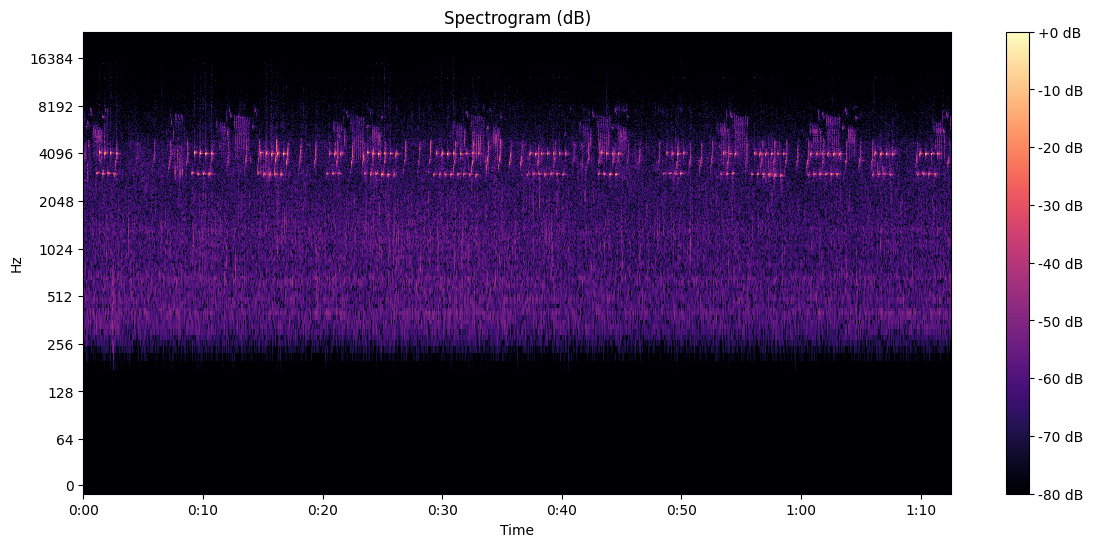

In [ ]:
# @title
# Load the WAV file
file_path = '/content/drive/MyDrive/xenoDL/00GreatTit/101022.wav'
y, sr = librosa.load(file_path, sr=44100)

print(f"Sample rate: {sr}")
print(f"Audio duration: {len(y) / sr:.2f} seconds")

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y, n_fft=2048, hop_length=512)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Visualize the spectrogram
plt.figure(figsize=(14, 6))
librosa.display.specshow(S_db, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.show()

In [ ]:
# @title Standardtext für Titel
import os
import json
import requests
from urllib.request import urlretrieve
from pydub import AudioSegment
from tqdm import tqdm

def get_sizeGB(start_path='.'):
    """Calculate the size of a directory in GB."""
    total_size = sum(os.path.getsize(os.path.join(dirpath, f))
                     for dirpath, _, filenames in os.walk(start_path)
                     for f in filenames if not os.path.islink(os.path.join(dirpath, f)))
    filecount = sum(len(filenames) for _, _, filenames in os.walk(start_path))
    return total_size / (10**9), filecount

# Change this to your desired root directory
root_directory = "/content/xenoDL"

# Mount Google Drive if using Colab (optional)
use_google_drive = False
if use_google_drive:
    from google.colab import drive
    drive.mount('/content/drive')
    root_directory = "/content/drive/MyDrive/xenoDL"

# Ensure root directory exists
os.makedirs(root_directory, exist_ok=True)
os.chdir(root_directory)
print(f"Current working directory: {os.getcwd()}")
print(f"Directory size: {get_sizeGB()} Gbytes")

# List of bird species
bird_species = [
    "Parus major",
    "Turdus merula",
    "Fringilla coelebs",
    "Phylloscopus collybita",
    "Erithacus rubecula",
    "Turdus philomelos",
    "Sylvia atricapilla",
    "Phylloscopus trochilus",
    "Cyanistes caeruleus",
    "Troglodytes troglodytes"
]

# User-specified list of bird species to download (leave empty to download all)
user_specified_bird_species = [
]
# Example: ["Parus major", "Turdus merula"]

# Determine which bird species to download
species_to_download = user_specified_bird_species if user_specified_bird_species else bird_species

# Construct queries for each bird species
queries = [
    f'https://xeno-canto.org/api/2/recordings?query={species.replace(" ", "+")}+type:"song"+cnt: "=Germany"+grp: "birds"+q: ">C"'
    for species in species_to_download
]

def get_bird_data(query, cache_file):
    """Fetch bird data from the provided query URL and cache it."""
    if os.path.exists(cache_file):
        print(f"Loading cached data from {cache_file}...")
        with open(cache_file, "r") as f:
            cached_data = json.load(f)
            return cached_data

    print(f"Fetching data from API: {query}")
    response = requests.get(query)
    if response.status_code == 200:
        data = response.json()
        print(f"Fetched {len(data['recordings'])} recordings.")
        with open(cache_file, "w") as f:
            json.dump(data, f)
        return data
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

# Fetch data for each bird species and cache the results
recordings = []
for species, query in zip(species_to_download, queries):
    cache_file = f"{species.replace(' ', '_')}_data_cache.json"
    data = get_bird_data(query, cache_file)
    if data:
        recordings.extend(data.get('recordings', []))

links = {rec["id"]: [rec["file"], rec["en"]] for rec in recordings}

alleArten = list(set([en.replace(" ", "") for _, en in links.values()]))
print("Available species:", alleArten)

def convert_to_wav(input_file, output_file, target_sample_rate=16000, target_channels=1):
    audio = AudioSegment.from_file(input_file)
    audio = audio.set_frame_rate(target_sample_rate)
    audio = audio.set_channels(target_channels)
    audio.export(output_file, format="wav")

# Create directories for bird types if not already created
for art in alleArten:
    os.makedirs(f"{root_directory}/{art}", exist_ok=True)

# Download the audio files with progress bar
for rec_id, (file_url, en) in tqdm(links.items(), desc="Downloading files"):
    bird_type = en.replace(" ", "")
    os.makedirs(f"{root_directory}/{bird_type}", exist_ok=True)
    os.chdir(f"{root_directory}/{bird_type}")
    filename = f"{rec_id}.mp3"
    wav_filename = f"{rec_id}.wav"

    if os.path.exists(wav_filename):
        print(f"File {wav_filename} already exists. Skipping download.")
    else:
        try:
            urlretrieve(file_url, filename)
            convert_to_wav(filename, wav_filename)
            os.remove(filename)
        except Exception as e:
            print(f"Error downloading or converting file {rec_id}: {e}")

def check_files_in_folder(filenames):
    """Check if all the expected files are present in the folder."""
    return [filename for filename in filenames if not os.path.exists(filename)]

filenames_to_check = [f"{rec_id}.wav" for rec_id in links]
missing_files = check_files_in_folder(filenames_to_check)

print(f"Missing files: {len(missing_files)} out of {len(links)}")

# Uploading a file from local PC to Colab (optional)
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#     print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Current working directory: /content/xenoDL
Directory size: (14.211422347, 2790) Gbytes
Loading cached data from Parus_major_data_cache.json...
Loading cached data from Turdus_merula_data_cache.json...
Loading cached data from Fringilla_coelebs_data_cache.json...
Loading cached data from Phylloscopus_collybita_data_cache.json...
Loading cached data from Erithacus_rubecula_data_cache.json...
Loading cached data from Turdus_philomelos_data_cache.json...
Loading cached data from Sylvia_atricapilla_data_cache.json...
Loading cached data from Phylloscopus_trochilus_data_cache.json...
Loading cached data from Cyanistes_caeruleus_data_cache.json...
Loading cached data from Troglodytes_troglodytes_data_cache.json...
Available species: ['WillowWarbler', 'CommonBlackbird', 'EurasianBlackcap', 'GreatTit', 'CommonChaffinch', 'EurasianWren', 'CommonChiffchaff', 'EurasianBlueTit', 'EuropeanRobin', 'SongThrush']


File 877604.wav already exists. Skipping download.
File 877559.wav already exists. Skipping download.
File 877554.wav already exists. Skipping download.
File 871177.wav already exists. Skipping download.
File 845019.wav already exists. Skipping download.
File 842245.wav already exists. Skipping download.
File 842243.wav already exists. Skipping download.
File 805377.wav already exists. Skipping download.
File 798517.wav already exists. Skipping download.
File 793160.wav already exists. Skipping download.
File 793158.wav already exists. Skipping download.
File 785370.wav already exists. Skipping download.
File 777118.wav already exists. Skipping download.
File 777116.wav already exists. Skipping download.
File 773452.wav already exists. Skipping download.
File 757053.wav already exists. Skipping download.
File 757024.wav already exists. Skipping download.
File 741377.wav already exists. Skipping download.
File 735437.wav already exists. Skipping download.
File 729993.wav already exists.

File 342650.wav already exists. Skipping download.
File 342649.wav already exists. Skipping download.
File 342647.wav already exists. Skipping download.
File 342646.wav already exists. Skipping download.
File 342645.wav already exists. Skipping download.
File 342644.wav already exists. Skipping download.
File 342640.wav already exists. Skipping download.
File 333047.wav already exists. Skipping download.
File 333046.wav already exists. Skipping download.
File 333045.wav already exists. Skipping download.
File 333044.wav already exists. Skipping download.
File 333043.wav already exists. Skipping download.
File 333036.wav already exists. Skipping download.
File 332985.wav already exists. Skipping download.
File 317074.wav already exists. Skipping download.
File 317063.wav already exists. Skipping download.
File 314894.wav already exists. Skipping download.
File 314202.wav already exists. Skipping download.
File 314195.wav already exists. Skipping download.
File 314189.wav already exists.

File 41261.wav already exists. Skipping download.
File 842063.wav already exists. Skipping download.
File 810432.wav already exists. Skipping download.
File 809393.wav already exists. Skipping download.
File 803447.wav already exists. Skipping download.
File 802472.wav already exists. Skipping download.
File 802471.wav already exists. Skipping download.
File 732739.wav already exists. Skipping download.
File 713658.wav already exists. Skipping download.
File 710660.wav already exists. Skipping download.
File 685370.wav already exists. Skipping download.
File 655553.wav already exists. Skipping download.
File 652305.wav already exists. Skipping download.
File 651675.wav already exists. Skipping download.
File 649033.wav already exists. Skipping download.
File 644649.wav already exists. Skipping download.
File 644410.wav already exists. Skipping download.
File 638363.wav already exists. Skipping download.
File 623791.wav already exists. Skipping download.
File 607303.wav already exists. 

File 410319.wav already exists. Skipping download.
File 397245.wav already exists. Skipping download.
File 393899.wav already exists. Skipping download.
File 389148.wav already exists. Skipping download.
File 385564.wav already exists. Skipping download.
File 380930.wav already exists. Skipping download.
File 376434.wav already exists. Skipping download.
File 374853.wav already exists. Skipping download.
File 374847.wav already exists. Skipping download.
File 374351.wav already exists. Skipping download.
File 374287.wav already exists. Skipping download.
File 373953.wav already exists. Skipping download.
File 369784.wav already exists. Skipping download.
File 369651.wav already exists. Skipping download.
File 368383.wav already exists. Skipping download.
File 365578.wav already exists. Skipping download.
File 364073.wav already exists. Skipping download.
File 364072.wav already exists. Skipping download.
File 363745.wav already exists. Skipping download.
File 360832.wav already exists.

File 534808.wav already exists. Skipping download.
File 491917.wav already exists. Skipping download.
File 485277.wav already exists. Skipping download.
File 481793.wav already exists. Skipping download.
File 481792.wav already exists. Skipping download.
File 481765.wav already exists. Skipping download.
File 480681.wav already exists. Skipping download.
File 441758.wav already exists. Skipping download.
File 437796.wav already exists. Skipping download.
File 418109.wav already exists. Skipping download.
File 418104.wav already exists. Skipping download.
File 418066.wav already exists. Skipping download.
File 406730.wav already exists. Skipping download.
File 400943.wav already exists. Skipping download.
File 399658.wav already exists. Skipping download.
File 384566.wav already exists. Skipping download.
File 384542.wav already exists. Skipping download.
File 376433.wav already exists. Skipping download.
File 374301.wav already exists. Skipping download.
File 371902.wav already exists.

## 2. Create the spectrograms

In [ ]:
import os
import random
import torch
import torchaudio
import torchaudio.transforms as T
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torchaudio.transforms as T
from tqdm import tqdm

# Define relevant frequency range
relevant_min_freq = 1024
relevant_max_freq = 8192

def calculate_relevant_bins(sample_rate, n_fft, min_freq, max_freq):
    bin_size = sample_rate / n_fft
    min_bin = int(min_freq / bin_size)
    max_bin = int(max_freq / bin_size)
    return min_bin, max_bin

def calculate_length(audio_directory, sample_rate=44100, n_fft=1024, win_length=None, hop_length=512, method='mean'):
    lengths = []
    for root, _, files in os.walk(audio_directory):
        for file in files:
            if file.endswith('.wav'):
                audio_path = os.path.join(root, file)
                waveform, sr = torchaudio.load(audio_path)
                resampler = T.Resample(orig_freq=sr, new_freq=sample_rate)
                waveform = resampler(waveform)

                spectrogram = T.Spectrogram(
                    sample_rate=sample_rate,
                    n_fft=n_fft,
                    win_length=win_length,
                    hop_length=hop_length,
                )(waveform)

                lengths.append(spectrogram.size(2))

    if method == 'mean':
        return int(np.mean(lengths))
    elif method == 'median':
        return int(np.median(lengths))
    else:
        raise ValueError("Method must be 'mean' or 'median'")

def create_spectrogram_dataset(audio_directory, output_directory, sample_rate=44100, n_fft=1024, win_length=None, hop_length=512, min_freq=relevant_min_freq, max_freq=relevant_max_freq):
    """Convert audio files in a directory to spectrograms and save them."""
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for root, _, files in os.walk(audio_directory):
        species = root.split(os.sep)[-1]
        for file in tqdm(files, desc=species):
            if file.endswith('.wav'):
                species_output_dir = os.path.join(output_directory, species)
                if not os.path.exists(species_output_dir):
                    os.makedirs(species_output_dir)

                audio_path = os.path.join(root, file)
                output_path = os.path.join(species_output_dir, file.replace('.wav', '.pt'))

                if os.path.exists(output_path):
                    print(f"Spectrogram for {file} already exists. Skipping conversion.")
                    continue

                waveform, sr = torchaudio.load(audio_path)
                resampler = T.Resample(orig_freq=sr, new_freq=sample_rate)
                waveform = resampler(waveform)

                # Create a MelSpectrogram transformation focusing on the relevant frequency range
                spectrogram = T.Spectrogram(
                    n_fft=n_fft,
                    win_length=win_length,
                    hop_length=hop_length,
                )(waveform)
                spectrogram = spectrogram[:, min_bin:max_bin-1, :]
                # Save the spectrogram tensor
                torch.save(spectrogram, output_path)
                #print(f"Saved spectrogram to {output_path}")

# Define the dataset class
class BirdsongDataset(Dataset):
    def __init__(self, spectrogram_dir, max_length, label_encoder):
        self.spectrogram_dir = spectrogram_dir
        self.max_length = max_length
        self.label_encoder = label_encoder
        self.files = []
        self.labels = []

        for species_dir in os.listdir(spectrogram_dir):
            species_path = os.path.join(spectrogram_dir, species_dir)
            if os.path.isdir(species_path):
                for file in os.listdir(species_path):
                    if file.endswith('.pt'):
                        self.files.append(os.path.join(species_path, file))
                        self.labels.append(species_dir)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        spectrogram = torch.load(self.files[idx])
        label = self.labels[idx]
        # Pad or truncate the spectrogram to the fixed length
        if spectrogram.size(2) > self.max_length:
            spectrogram = spectrogram[:, :, :self.max_length]
        else:
            pad_amount = self.max_length - spectrogram.size(2)
            spectrogram = F.pad(spectrogram, (0, pad_amount))

        #label = self.label_encoder.transform([label])[0]
        return spectrogram, label

def visualize_spectrogram(spectrogram, title="Spectrogram"):
    """Visualize a spectrogram in the notebook."""
    spectrogram = spectrogram.numpy()
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(spectrogram[0], ref=np.max), sr=44100, hop_length=512, y_axis='freq', fmin=1025, fmax=8192, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def collate_fn(batch):
    """Collate function to pad/truncate spectrograms to the same size."""
    spectrograms, labels = zip(*batch)

    # Check if any spectrograms are empty
    #print(max_length)
    #max_length = max([s.size(2) for s in spectrograms])
    #print(max_length)
    padded_spectrograms = []
    for s in spectrograms:
        if s.size(2) == 0:
            print("Found an empty spectrogram.")
            continue
        if s.size(2) > max_length:
            s = s[:, :, :max_length]
        else:
            pad_amount = max_length - s.size(2)
            s = F.pad(s, (0, pad_amount))
        padded_spectrograms.append(s)

    if len(padded_spectrograms) == 0:
        raise RuntimeError("All spectrograms are empty.")


    if isinstance(labels[0], str):
        unique_labels = list(set(labels))
        label_to_index = {label: index for index, label in enumerate(unique_labels)}
        labels = [label_to_index[label] for label in labels]

    spectrograms = torch.stack(padded_spectrograms)

    labels = torch.tensor(labels[:len(padded_spectrograms)])  # Ensure labels match spectrograms
    return spectrograms, labels
import shutil
import os

shutil.copytree('/content/drive/MyDrive/Filtered_spectrograms', '/content/Filtered_spectrograms')

# Define paths
audio_directory = "/content/drive/MyDrive/xenoDL/"  # Change this to your audio files directory
output_directory = "/content/Filtered_spectrograms"  # Change this to your desired output directory

min_bin,max_bin=calculate_relevant_bins(44100,1024,relevant_min_freq,relevant_max_freq)
#shutil.rmtree("/content/Filtered_spectrograms/05SongThrush")

copyfrom_directory="/content/drive/MyDrive/Filtered_spectrograms"
copyto_directory = "/content/Filtered_spectrograms"
for root, _, files in os.walk(copyfrom_directory):
    species = root.split(os.sep)[-1]
    for file in tqdm(files, desc=species):
        if file.endswith('.pt'):
            species_output_dir = os.path.join(output_directory, species)
            if not os.path.exists(species_output_dir):
                os.makedirs(species_output_dir)

            input_path = os.path.join(root, file)
            output_path = os.path.join(species_output_dir, file)

            if os.path.exists(output_path):
                #print(f"Spectrogram for {output_path} already exists. Skipping copying.")
                continue
            print(f"Copying to {output_path}." )
            shutil.copy(input_path,output_path)


#if os.path.isdir("/content/Filtered_spectrograms"):
    #shutil.rmtree("/content/Filtered_spectrograms")


# Convert audio files to spectrogram dataset
create_spectrogram_dataset(audio_directory, output_directory)

max_length = int(512)
# Calculate max length for spectrograms
if not "max_length" in globals():
    # Calculate length for spectrograms
    length_method = 'median'  # Change to 'mean' if you want to use the mean length
    length = calculate_length(audio_directory, method=length_method)/6
    print(f"Calculated {length_method} length for spectrograms: {length}")

    max_length = length #calculate_max_length(audio_directory)
print(f"Calculated max length for spectrograms: {max_length}")

# Encode labels
label_encoder = LabelEncoder()
all_species = [species for species in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, species))]
label_encoder.fit(all_species)

# Create dataset with calculated max length
dataset = BirdsongDataset(output_directory, max_length=max_length, label_encoder=label_encoder)





Error: [('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/814693.pt', '/content/Filtered_spectrograms/05SongThrush/814693.pt', '[Errno 107] Transport endpoint is not connected'), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/814052.pt', '/content/Filtered_spectrograms/05SongThrush/814052.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/814052.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/798348.pt', '/content/Filtered_spectrograms/05SongThrush/798348.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/798348.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/788760.pt', '/content/Filtered_spectrograms/05SongThrush/788760.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/788760.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/786664.pt', '/content/Filtered_spectrograms/05SongThrush/786664.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/786664.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/786067.pt', '/content/Filtered_spectrograms/05SongThrush/786067.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/786067.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/782914.pt', '/content/Filtered_spectrograms/05SongThrush/782914.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/782914.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/776380.pt', '/content/Filtered_spectrograms/05SongThrush/776380.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/776380.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/760861.pt', '/content/Filtered_spectrograms/05SongThrush/760861.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/760861.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/758414.pt', '/content/Filtered_spectrograms/05SongThrush/758414.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/758414.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/757190.pt', '/content/Filtered_spectrograms/05SongThrush/757190.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/757190.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/757027.pt', '/content/Filtered_spectrograms/05SongThrush/757027.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/757027.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/735687.pt', '/content/Filtered_spectrograms/05SongThrush/735687.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/735687.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/728696.pt', '/content/Filtered_spectrograms/05SongThrush/728696.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/728696.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/720545.pt', '/content/Filtered_spectrograms/05SongThrush/720545.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/720545.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/720407.pt', '/content/Filtered_spectrograms/05SongThrush/720407.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/720407.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/711523.pt', '/content/Filtered_spectrograms/05SongThrush/711523.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/711523.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/709702.pt', '/content/Filtered_spectrograms/05SongThrush/709702.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/709702.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/704946.pt', '/content/Filtered_spectrograms/05SongThrush/704946.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/704946.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/704780.pt', '/content/Filtered_spectrograms/05SongThrush/704780.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/704780.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/694611.pt', '/content/Filtered_spectrograms/05SongThrush/694611.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/694611.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/685428.pt', '/content/Filtered_spectrograms/05SongThrush/685428.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/685428.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/663400.pt', '/content/Filtered_spectrograms/05SongThrush/663400.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/663400.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/662112.pt', '/content/Filtered_spectrograms/05SongThrush/662112.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/662112.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/654110.pt', '/content/Filtered_spectrograms/05SongThrush/654110.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/654110.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/651232.pt', '/content/Filtered_spectrograms/05SongThrush/651232.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/651232.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/651001.pt', '/content/Filtered_spectrograms/05SongThrush/651001.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/651001.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/637676.pt', '/content/Filtered_spectrograms/05SongThrush/637676.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/637676.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/635908.pt', '/content/Filtered_spectrograms/05SongThrush/635908.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/635908.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/635657.pt', '/content/Filtered_spectrograms/05SongThrush/635657.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/635657.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/635476.pt', '/content/Filtered_spectrograms/05SongThrush/635476.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/635476.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/630199.pt', '/content/Filtered_spectrograms/05SongThrush/630199.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/630199.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/630043.pt', '/content/Filtered_spectrograms/05SongThrush/630043.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/630043.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/629786.pt', '/content/Filtered_spectrograms/05SongThrush/629786.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/629786.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/629628.pt', '/content/Filtered_spectrograms/05SongThrush/629628.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/629628.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/629423.pt', '/content/Filtered_spectrograms/05SongThrush/629423.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/629423.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/629414.pt', '/content/Filtered_spectrograms/05SongThrush/629414.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/629414.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/628320.pt', '/content/Filtered_spectrograms/05SongThrush/628320.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/628320.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/611037.pt', '/content/Filtered_spectrograms/05SongThrush/611037.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/611037.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/607890.pt', '/content/Filtered_spectrograms/05SongThrush/607890.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/607890.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/590801.pt', '/content/Filtered_spectrograms/05SongThrush/590801.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/590801.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/574198.pt', '/content/Filtered_spectrograms/05SongThrush/574198.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/574198.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/549367.pt', '/content/Filtered_spectrograms/05SongThrush/549367.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/549367.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/549366.pt', '/content/Filtered_spectrograms/05SongThrush/549366.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/549366.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/549365.pt', '/content/Filtered_spectrograms/05SongThrush/549365.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/549365.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/534767.pt', '/content/Filtered_spectrograms/05SongThrush/534767.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/534767.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/533242.pt', '/content/Filtered_spectrograms/05SongThrush/533242.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/533242.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/532209.pt', '/content/Filtered_spectrograms/05SongThrush/532209.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/532209.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/531072.pt', '/content/Filtered_spectrograms/05SongThrush/531072.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/531072.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/488738.pt', '/content/Filtered_spectrograms/05SongThrush/488738.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/488738.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/487552.pt', '/content/Filtered_spectrograms/05SongThrush/487552.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/487552.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/487530.pt', '/content/Filtered_spectrograms/05SongThrush/487530.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/487530.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/484661.pt', '/content/Filtered_spectrograms/05SongThrush/484661.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/484661.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/483825.pt', '/content/Filtered_spectrograms/05SongThrush/483825.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/483825.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/481789.pt', '/content/Filtered_spectrograms/05SongThrush/481789.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/481789.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/480827.pt', '/content/Filtered_spectrograms/05SongThrush/480827.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/480827.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/474940.pt', '/content/Filtered_spectrograms/05SongThrush/474940.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/474940.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/473193.pt', '/content/Filtered_spectrograms/05SongThrush/473193.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/473193.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/473190.pt', '/content/Filtered_spectrograms/05SongThrush/473190.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/473190.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/468023.pt', '/content/Filtered_spectrograms/05SongThrush/468023.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/468023.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/466622.pt', '/content/Filtered_spectrograms/05SongThrush/466622.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/466622.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463143.pt', '/content/Filtered_spectrograms/05SongThrush/463143.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463143.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463142.pt', '/content/Filtered_spectrograms/05SongThrush/463142.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463142.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/429059.pt', '/content/Filtered_spectrograms/05SongThrush/429059.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/429059.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/416541.pt', '/content/Filtered_spectrograms/05SongThrush/416541.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/416541.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/415255.pt', '/content/Filtered_spectrograms/05SongThrush/415255.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/415255.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/415241.pt', '/content/Filtered_spectrograms/05SongThrush/415241.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/415241.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/412898.pt', '/content/Filtered_spectrograms/05SongThrush/412898.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/412898.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/412897.pt', '/content/Filtered_spectrograms/05SongThrush/412897.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/412897.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410026.pt', '/content/Filtered_spectrograms/05SongThrush/410026.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410026.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410025.pt', '/content/Filtered_spectrograms/05SongThrush/410025.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410025.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/407199.pt', '/content/Filtered_spectrograms/05SongThrush/407199.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/407199.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/407198.pt', '/content/Filtered_spectrograms/05SongThrush/407198.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/407198.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/393900.pt', '/content/Filtered_spectrograms/05SongThrush/393900.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/393900.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/387488.pt', '/content/Filtered_spectrograms/05SongThrush/387488.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/387488.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/387487.pt', '/content/Filtered_spectrograms/05SongThrush/387487.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/387487.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/386010.pt', '/content/Filtered_spectrograms/05SongThrush/386010.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/386010.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/386009.pt', '/content/Filtered_spectrograms/05SongThrush/386009.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/386009.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/385158.pt', '/content/Filtered_spectrograms/05SongThrush/385158.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/385158.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/385156.pt', '/content/Filtered_spectrograms/05SongThrush/385156.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/385156.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/384540.pt', '/content/Filtered_spectrograms/05SongThrush/384540.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/384540.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/376000.pt', '/content/Filtered_spectrograms/05SongThrush/376000.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/376000.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/375995.pt', '/content/Filtered_spectrograms/05SongThrush/375995.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/375995.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/375986.pt', '/content/Filtered_spectrograms/05SongThrush/375986.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/375986.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/375981.pt', '/content/Filtered_spectrograms/05SongThrush/375981.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/375981.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/362598.pt', '/content/Filtered_spectrograms/05SongThrush/362598.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/362598.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360250.pt', '/content/Filtered_spectrograms/05SongThrush/360250.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360250.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/357853.pt', '/content/Filtered_spectrograms/05SongThrush/357853.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/357853.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/357702.pt', '/content/Filtered_spectrograms/05SongThrush/357702.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/357702.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348936.pt', '/content/Filtered_spectrograms/05SongThrush/348936.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348936.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348918.pt', '/content/Filtered_spectrograms/05SongThrush/348918.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348918.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348743.pt', '/content/Filtered_spectrograms/05SongThrush/348743.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348743.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348739.pt', '/content/Filtered_spectrograms/05SongThrush/348739.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348739.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/326846.pt', '/content/Filtered_spectrograms/05SongThrush/326846.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/326846.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/312620.pt', '/content/Filtered_spectrograms/05SongThrush/312620.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/312620.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/308732.pt', '/content/Filtered_spectrograms/05SongThrush/308732.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/308732.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/307964.pt', '/content/Filtered_spectrograms/05SongThrush/307964.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/307964.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/307891.pt', '/content/Filtered_spectrograms/05SongThrush/307891.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/307891.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/307574.pt', '/content/Filtered_spectrograms/05SongThrush/307574.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/307574.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/306318.pt', '/content/Filtered_spectrograms/05SongThrush/306318.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/306318.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/305936.pt', '/content/Filtered_spectrograms/05SongThrush/305936.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/305936.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/305934.pt', '/content/Filtered_spectrograms/05SongThrush/305934.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/305934.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/301077.pt', '/content/Filtered_spectrograms/05SongThrush/301077.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/301077.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/234417.pt', '/content/Filtered_spectrograms/05SongThrush/234417.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/234417.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217901.pt', '/content/Filtered_spectrograms/05SongThrush/217901.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217901.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/186473.pt', '/content/Filtered_spectrograms/05SongThrush/186473.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/186473.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184295.pt', '/content/Filtered_spectrograms/05SongThrush/184295.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184295.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179569.pt', '/content/Filtered_spectrograms/05SongThrush/179569.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179569.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/156022.pt', '/content/Filtered_spectrograms/05SongThrush/156022.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/156022.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/142821.pt', '/content/Filtered_spectrograms/05SongThrush/142821.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/142821.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/142437.pt', '/content/Filtered_spectrograms/05SongThrush/142437.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/142437.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/138572.pt', '/content/Filtered_spectrograms/05SongThrush/138572.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/138572.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/133439.pt', '/content/Filtered_spectrograms/05SongThrush/133439.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/133439.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/128708.pt', '/content/Filtered_spectrograms/05SongThrush/128708.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/128708.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/122243.pt', '/content/Filtered_spectrograms/05SongThrush/122243.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/122243.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/103927.pt', '/content/Filtered_spectrograms/05SongThrush/103927.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/103927.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/94828.pt', '/content/Filtered_spectrograms/05SongThrush/94828.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/94828.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/75206.pt', '/content/Filtered_spectrograms/05SongThrush/75206.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/75206.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/74083.pt', '/content/Filtered_spectrograms/05SongThrush/74083.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/74083.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/72646.pt', '/content/Filtered_spectrograms/05SongThrush/72646.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/72646.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/72545.pt', '/content/Filtered_spectrograms/05SongThrush/72545.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/72545.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/72544.pt', '/content/Filtered_spectrograms/05SongThrush/72544.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/72544.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/72543.pt', '/content/Filtered_spectrograms/05SongThrush/72543.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/72543.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/48551.pt', '/content/Filtered_spectrograms/05SongThrush/48551.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/48551.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/910270.pt', '/content/Filtered_spectrograms/05SongThrush/910270.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/910270.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/843035.pt', '/content/Filtered_spectrograms/05SongThrush/843035.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/843035.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/831674.pt', '/content/Filtered_spectrograms/05SongThrush/831674.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/831674.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/827890.pt', '/content/Filtered_spectrograms/05SongThrush/827890.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/827890.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/827889.pt', '/content/Filtered_spectrograms/05SongThrush/827889.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/827889.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/822847.pt', '/content/Filtered_spectrograms/05SongThrush/822847.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/822847.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/815954.pt', '/content/Filtered_spectrograms/05SongThrush/815954.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/815954.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/802575.pt', '/content/Filtered_spectrograms/05SongThrush/802575.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/802575.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/799540.pt', '/content/Filtered_spectrograms/05SongThrush/799540.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/799540.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/757368.pt', '/content/Filtered_spectrograms/05SongThrush/757368.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/757368.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/750354.pt', '/content/Filtered_spectrograms/05SongThrush/750354.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/750354.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/741372.pt', '/content/Filtered_spectrograms/05SongThrush/741372.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/741372.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/726043.pt', '/content/Filtered_spectrograms/05SongThrush/726043.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/726043.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/716095.pt', '/content/Filtered_spectrograms/05SongThrush/716095.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/716095.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/710652.pt', '/content/Filtered_spectrograms/05SongThrush/710652.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/710652.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/708103.pt', '/content/Filtered_spectrograms/05SongThrush/708103.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/708103.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/690036.pt', '/content/Filtered_spectrograms/05SongThrush/690036.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/690036.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/688079.pt', '/content/Filtered_spectrograms/05SongThrush/688079.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/688079.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/688078.pt', '/content/Filtered_spectrograms/05SongThrush/688078.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/688078.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/662566.pt', '/content/Filtered_spectrograms/05SongThrush/662566.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/662566.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/662283.pt', '/content/Filtered_spectrograms/05SongThrush/662283.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/662283.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/662282.pt', '/content/Filtered_spectrograms/05SongThrush/662282.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/662282.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661221.pt', '/content/Filtered_spectrograms/05SongThrush/661221.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661221.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661220.pt', '/content/Filtered_spectrograms/05SongThrush/661220.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661220.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661219.pt', '/content/Filtered_spectrograms/05SongThrush/661219.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661219.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661216.pt', '/content/Filtered_spectrograms/05SongThrush/661216.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661216.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661215.pt', '/content/Filtered_spectrograms/05SongThrush/661215.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/661215.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/657758.pt', '/content/Filtered_spectrograms/05SongThrush/657758.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/657758.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/649684.pt', '/content/Filtered_spectrograms/05SongThrush/649684.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/649684.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/640496.pt', '/content/Filtered_spectrograms/05SongThrush/640496.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/640496.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/635151.pt', '/content/Filtered_spectrograms/05SongThrush/635151.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/635151.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/634658.pt', '/content/Filtered_spectrograms/05SongThrush/634658.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/634658.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/632015.pt', '/content/Filtered_spectrograms/05SongThrush/632015.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/632015.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/631986.pt', '/content/Filtered_spectrograms/05SongThrush/631986.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/631986.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/631608.pt', '/content/Filtered_spectrograms/05SongThrush/631608.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/631608.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/630726.pt', '/content/Filtered_spectrograms/05SongThrush/630726.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/630726.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/615625.pt', '/content/Filtered_spectrograms/05SongThrush/615625.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/615625.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/603770.pt', '/content/Filtered_spectrograms/05SongThrush/603770.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/603770.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/573326.pt', '/content/Filtered_spectrograms/05SongThrush/573326.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/573326.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/570028.pt', '/content/Filtered_spectrograms/05SongThrush/570028.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/570028.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/568664.pt', '/content/Filtered_spectrograms/05SongThrush/568664.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/568664.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/564639.pt', '/content/Filtered_spectrograms/05SongThrush/564639.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/564639.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/564638.pt', '/content/Filtered_spectrograms/05SongThrush/564638.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/564638.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/557269.pt', '/content/Filtered_spectrograms/05SongThrush/557269.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/557269.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/541389.pt', '/content/Filtered_spectrograms/05SongThrush/541389.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/541389.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/537988.pt', '/content/Filtered_spectrograms/05SongThrush/537988.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/537988.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/533817.pt', '/content/Filtered_spectrograms/05SongThrush/533817.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/533817.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/533231.pt', '/content/Filtered_spectrograms/05SongThrush/533231.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/533231.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/532210.pt', '/content/Filtered_spectrograms/05SongThrush/532210.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/532210.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/531929.pt', '/content/Filtered_spectrograms/05SongThrush/531929.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/531929.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/531928.pt', '/content/Filtered_spectrograms/05SongThrush/531928.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/531928.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/531927.pt', '/content/Filtered_spectrograms/05SongThrush/531927.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/531927.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/494806.pt', '/content/Filtered_spectrograms/05SongThrush/494806.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/494806.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/493373.pt', '/content/Filtered_spectrograms/05SongThrush/493373.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/493373.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/481077.pt', '/content/Filtered_spectrograms/05SongThrush/481077.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/481077.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/480022.pt', '/content/Filtered_spectrograms/05SongThrush/480022.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/480022.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/475532.pt', '/content/Filtered_spectrograms/05SongThrush/475532.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/475532.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/475531.pt', '/content/Filtered_spectrograms/05SongThrush/475531.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/475531.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/475344.pt', '/content/Filtered_spectrograms/05SongThrush/475344.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/475344.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/465839.pt', '/content/Filtered_spectrograms/05SongThrush/465839.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/465839.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463970.pt', '/content/Filtered_spectrograms/05SongThrush/463970.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463970.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463753.pt', '/content/Filtered_spectrograms/05SongThrush/463753.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463753.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463452.pt', '/content/Filtered_spectrograms/05SongThrush/463452.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463452.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463451.pt', '/content/Filtered_spectrograms/05SongThrush/463451.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463451.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463181.pt', '/content/Filtered_spectrograms/05SongThrush/463181.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463181.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463180.pt', '/content/Filtered_spectrograms/05SongThrush/463180.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463180.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463177.pt', '/content/Filtered_spectrograms/05SongThrush/463177.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463177.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463171.pt', '/content/Filtered_spectrograms/05SongThrush/463171.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/463171.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/461956.pt', '/content/Filtered_spectrograms/05SongThrush/461956.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/461956.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/461955.pt', '/content/Filtered_spectrograms/05SongThrush/461955.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/461955.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/435863.pt', '/content/Filtered_spectrograms/05SongThrush/435863.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/435863.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/435860.pt', '/content/Filtered_spectrograms/05SongThrush/435860.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/435860.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/419965.pt', '/content/Filtered_spectrograms/05SongThrush/419965.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/419965.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/419851.pt', '/content/Filtered_spectrograms/05SongThrush/419851.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/419851.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/419728.pt', '/content/Filtered_spectrograms/05SongThrush/419728.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/419728.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/419725.pt', '/content/Filtered_spectrograms/05SongThrush/419725.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/419725.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/418089.pt', '/content/Filtered_spectrograms/05SongThrush/418089.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/418089.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/417984.pt', '/content/Filtered_spectrograms/05SongThrush/417984.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/417984.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/411681.pt', '/content/Filtered_spectrograms/05SongThrush/411681.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/411681.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/411665.pt', '/content/Filtered_spectrograms/05SongThrush/411665.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/411665.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410987.pt', '/content/Filtered_spectrograms/05SongThrush/410987.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410987.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410636.pt', '/content/Filtered_spectrograms/05SongThrush/410636.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410636.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410323.pt', '/content/Filtered_spectrograms/05SongThrush/410323.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410323.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410319.pt', '/content/Filtered_spectrograms/05SongThrush/410319.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/410319.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/397245.pt', '/content/Filtered_spectrograms/05SongThrush/397245.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/397245.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/393899.pt', '/content/Filtered_spectrograms/05SongThrush/393899.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/393899.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/389148.pt', '/content/Filtered_spectrograms/05SongThrush/389148.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/389148.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/385564.pt', '/content/Filtered_spectrograms/05SongThrush/385564.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/385564.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/380930.pt', '/content/Filtered_spectrograms/05SongThrush/380930.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/380930.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/376434.pt', '/content/Filtered_spectrograms/05SongThrush/376434.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/376434.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/374853.pt', '/content/Filtered_spectrograms/05SongThrush/374853.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/374853.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/374847.pt', '/content/Filtered_spectrograms/05SongThrush/374847.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/374847.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/374351.pt', '/content/Filtered_spectrograms/05SongThrush/374351.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/374351.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/374287.pt', '/content/Filtered_spectrograms/05SongThrush/374287.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/374287.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/373953.pt', '/content/Filtered_spectrograms/05SongThrush/373953.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/373953.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/369784.pt', '/content/Filtered_spectrograms/05SongThrush/369784.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/369784.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/369651.pt', '/content/Filtered_spectrograms/05SongThrush/369651.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/369651.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/368383.pt', '/content/Filtered_spectrograms/05SongThrush/368383.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/368383.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/365578.pt', '/content/Filtered_spectrograms/05SongThrush/365578.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/365578.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/364073.pt', '/content/Filtered_spectrograms/05SongThrush/364073.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/364073.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/364072.pt', '/content/Filtered_spectrograms/05SongThrush/364072.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/364072.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/363745.pt', '/content/Filtered_spectrograms/05SongThrush/363745.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/363745.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360832.pt', '/content/Filtered_spectrograms/05SongThrush/360832.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360832.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360456.pt', '/content/Filtered_spectrograms/05SongThrush/360456.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360456.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360264.pt', '/content/Filtered_spectrograms/05SongThrush/360264.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360264.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360261.pt', '/content/Filtered_spectrograms/05SongThrush/360261.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/360261.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/358934.pt', '/content/Filtered_spectrograms/05SongThrush/358934.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/358934.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/357833.pt', '/content/Filtered_spectrograms/05SongThrush/357833.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/357833.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/349149.pt', '/content/Filtered_spectrograms/05SongThrush/349149.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/349149.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/349145.pt', '/content/Filtered_spectrograms/05SongThrush/349145.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/349145.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348745.pt', '/content/Filtered_spectrograms/05SongThrush/348745.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348745.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348657.pt', '/content/Filtered_spectrograms/05SongThrush/348657.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/348657.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/344523.pt', '/content/Filtered_spectrograms/05SongThrush/344523.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/344523.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/344521.pt', '/content/Filtered_spectrograms/05SongThrush/344521.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/344521.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/337754.pt', '/content/Filtered_spectrograms/05SongThrush/337754.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/337754.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/335873.pt', '/content/Filtered_spectrograms/05SongThrush/335873.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/335873.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/335035.pt', '/content/Filtered_spectrograms/05SongThrush/335035.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/335035.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/334858.pt', '/content/Filtered_spectrograms/05SongThrush/334858.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/334858.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/334063.pt', '/content/Filtered_spectrograms/05SongThrush/334063.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/334063.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333888.pt', '/content/Filtered_spectrograms/05SongThrush/333888.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333888.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333882.pt', '/content/Filtered_spectrograms/05SongThrush/333882.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333882.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333468.pt', '/content/Filtered_spectrograms/05SongThrush/333468.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333468.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333467.pt', '/content/Filtered_spectrograms/05SongThrush/333467.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333467.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333098.pt', '/content/Filtered_spectrograms/05SongThrush/333098.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/333098.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/331696.pt', '/content/Filtered_spectrograms/05SongThrush/331696.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/331696.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/329855.pt', '/content/Filtered_spectrograms/05SongThrush/329855.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/329855.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/327321.pt', '/content/Filtered_spectrograms/05SongThrush/327321.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/327321.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/327317.pt', '/content/Filtered_spectrograms/05SongThrush/327317.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/327317.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/326848.pt', '/content/Filtered_spectrograms/05SongThrush/326848.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/326848.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/326436.pt', '/content/Filtered_spectrograms/05SongThrush/326436.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/326436.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/326435.pt', '/content/Filtered_spectrograms/05SongThrush/326435.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/326435.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324568.pt', '/content/Filtered_spectrograms/05SongThrush/324568.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324568.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324421.pt', '/content/Filtered_spectrograms/05SongThrush/324421.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324421.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324165.pt', '/content/Filtered_spectrograms/05SongThrush/324165.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324165.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324138.pt', '/content/Filtered_spectrograms/05SongThrush/324138.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324138.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324137.pt', '/content/Filtered_spectrograms/05SongThrush/324137.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324137.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324135.pt', '/content/Filtered_spectrograms/05SongThrush/324135.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/324135.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/323795.pt', '/content/Filtered_spectrograms/05SongThrush/323795.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/323795.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320959.pt', '/content/Filtered_spectrograms/05SongThrush/320959.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320959.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320162.pt', '/content/Filtered_spectrograms/05SongThrush/320162.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320162.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320161.pt', '/content/Filtered_spectrograms/05SongThrush/320161.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320161.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320160.pt', '/content/Filtered_spectrograms/05SongThrush/320160.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320160.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320155.pt', '/content/Filtered_spectrograms/05SongThrush/320155.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320155.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320154.pt', '/content/Filtered_spectrograms/05SongThrush/320154.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/320154.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319624.pt', '/content/Filtered_spectrograms/05SongThrush/319624.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319624.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319623.pt', '/content/Filtered_spectrograms/05SongThrush/319623.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319623.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319621.pt', '/content/Filtered_spectrograms/05SongThrush/319621.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319621.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319618.pt', '/content/Filtered_spectrograms/05SongThrush/319618.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319618.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319617.pt', '/content/Filtered_spectrograms/05SongThrush/319617.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/319617.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/316159.pt', '/content/Filtered_spectrograms/05SongThrush/316159.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/316159.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/316156.pt', '/content/Filtered_spectrograms/05SongThrush/316156.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/316156.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/315808.pt', '/content/Filtered_spectrograms/05SongThrush/315808.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/315808.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/313268.pt', '/content/Filtered_spectrograms/05SongThrush/313268.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/313268.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/313256.pt', '/content/Filtered_spectrograms/05SongThrush/313256.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/313256.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/311571.pt', '/content/Filtered_spectrograms/05SongThrush/311571.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/311571.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/310473.pt', '/content/Filtered_spectrograms/05SongThrush/310473.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/310473.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/308005.pt', '/content/Filtered_spectrograms/05SongThrush/308005.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/308005.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/305937.pt', '/content/Filtered_spectrograms/05SongThrush/305937.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/305937.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/304923.pt', '/content/Filtered_spectrograms/05SongThrush/304923.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/304923.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/287195.pt', '/content/Filtered_spectrograms/05SongThrush/287195.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/287195.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/277000.pt', '/content/Filtered_spectrograms/05SongThrush/277000.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/277000.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/254837.pt', '/content/Filtered_spectrograms/05SongThrush/254837.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/254837.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/246650.pt', '/content/Filtered_spectrograms/05SongThrush/246650.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/246650.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/244512.pt', '/content/Filtered_spectrograms/05SongThrush/244512.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/244512.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/243655.pt', '/content/Filtered_spectrograms/05SongThrush/243655.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/243655.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/240123.pt', '/content/Filtered_spectrograms/05SongThrush/240123.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/240123.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/237139.pt', '/content/Filtered_spectrograms/05SongThrush/237139.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/237139.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/236904.pt', '/content/Filtered_spectrograms/05SongThrush/236904.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/236904.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/236305.pt', '/content/Filtered_spectrograms/05SongThrush/236305.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/236305.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/234779.pt', '/content/Filtered_spectrograms/05SongThrush/234779.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/234779.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233642.pt', '/content/Filtered_spectrograms/05SongThrush/233642.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233642.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233641.pt', '/content/Filtered_spectrograms/05SongThrush/233641.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233641.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233627.pt', '/content/Filtered_spectrograms/05SongThrush/233627.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233627.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233525.pt', '/content/Filtered_spectrograms/05SongThrush/233525.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233525.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233523.pt', '/content/Filtered_spectrograms/05SongThrush/233523.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233523.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233520.pt', '/content/Filtered_spectrograms/05SongThrush/233520.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233520.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233518.pt', '/content/Filtered_spectrograms/05SongThrush/233518.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233518.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233511.pt', '/content/Filtered_spectrograms/05SongThrush/233511.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233511.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233508.pt', '/content/Filtered_spectrograms/05SongThrush/233508.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233508.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233507.pt', '/content/Filtered_spectrograms/05SongThrush/233507.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/233507.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/231484.pt', '/content/Filtered_spectrograms/05SongThrush/231484.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/231484.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/225690.pt', '/content/Filtered_spectrograms/05SongThrush/225690.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/225690.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/225385.pt', '/content/Filtered_spectrograms/05SongThrush/225385.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/225385.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217576.pt', '/content/Filtered_spectrograms/05SongThrush/217576.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217576.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217575.pt', '/content/Filtered_spectrograms/05SongThrush/217575.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217575.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217574.pt', '/content/Filtered_spectrograms/05SongThrush/217574.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217574.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217421.pt', '/content/Filtered_spectrograms/05SongThrush/217421.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217421.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217414.pt', '/content/Filtered_spectrograms/05SongThrush/217414.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/217414.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/216560.pt', '/content/Filtered_spectrograms/05SongThrush/216560.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/216560.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/216557.pt', '/content/Filtered_spectrograms/05SongThrush/216557.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/216557.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/216371.pt', '/content/Filtered_spectrograms/05SongThrush/216371.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/216371.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/216370.pt', '/content/Filtered_spectrograms/05SongThrush/216370.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/216370.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215368.pt', '/content/Filtered_spectrograms/05SongThrush/215368.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215368.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215152.pt', '/content/Filtered_spectrograms/05SongThrush/215152.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215152.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215151.pt', '/content/Filtered_spectrograms/05SongThrush/215151.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215151.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215150.pt', '/content/Filtered_spectrograms/05SongThrush/215150.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215150.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215087.pt', '/content/Filtered_spectrograms/05SongThrush/215087.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/215087.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/214793.pt', '/content/Filtered_spectrograms/05SongThrush/214793.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/214793.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/214792.pt', '/content/Filtered_spectrograms/05SongThrush/214792.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/214792.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/213739.pt', '/content/Filtered_spectrograms/05SongThrush/213739.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/213739.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/186474.pt', '/content/Filtered_spectrograms/05SongThrush/186474.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/186474.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184689.pt', '/content/Filtered_spectrograms/05SongThrush/184689.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184689.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184688.pt', '/content/Filtered_spectrograms/05SongThrush/184688.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184688.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184687.pt', '/content/Filtered_spectrograms/05SongThrush/184687.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184687.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184681.pt', '/content/Filtered_spectrograms/05SongThrush/184681.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184681.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184680.pt', '/content/Filtered_spectrograms/05SongThrush/184680.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/184680.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/183629.pt', '/content/Filtered_spectrograms/05SongThrush/183629.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/183629.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/183615.pt', '/content/Filtered_spectrograms/05SongThrush/183615.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/183615.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/182019.pt', '/content/Filtered_spectrograms/05SongThrush/182019.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/182019.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/181595.pt', '/content/Filtered_spectrograms/05SongThrush/181595.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/181595.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/181310.pt', '/content/Filtered_spectrograms/05SongThrush/181310.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/181310.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179570.pt', '/content/Filtered_spectrograms/05SongThrush/179570.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179570.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179208.pt', '/content/Filtered_spectrograms/05SongThrush/179208.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179208.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179004.pt', '/content/Filtered_spectrograms/05SongThrush/179004.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179004.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179002.pt', '/content/Filtered_spectrograms/05SongThrush/179002.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/179002.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178544.pt', '/content/Filtered_spectrograms/05SongThrush/178544.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178544.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178355.pt', '/content/Filtered_spectrograms/05SongThrush/178355.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178355.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178352.pt', '/content/Filtered_spectrograms/05SongThrush/178352.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178352.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178037.pt', '/content/Filtered_spectrograms/05SongThrush/178037.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178037.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178035.pt', '/content/Filtered_spectrograms/05SongThrush/178035.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/178035.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/177179.pt', '/content/Filtered_spectrograms/05SongThrush/177179.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/177179.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/175159.pt', '/content/Filtered_spectrograms/05SongThrush/175159.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/175159.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/174916.pt', '/content/Filtered_spectrograms/05SongThrush/174916.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/174916.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/171712.pt', '/content/Filtered_spectrograms/05SongThrush/171712.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/171712.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/171616.pt', '/content/Filtered_spectrograms/05SongThrush/171616.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/171616.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/171485.pt', '/content/Filtered_spectrograms/05SongThrush/171485.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/171485.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/171261.pt', '/content/Filtered_spectrograms/05SongThrush/171261.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/171261.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170880.pt', '/content/Filtered_spectrograms/05SongThrush/170880.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170880.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170730.pt', '/content/Filtered_spectrograms/05SongThrush/170730.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170730.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170498.pt', '/content/Filtered_spectrograms/05SongThrush/170498.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170498.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170470.pt', '/content/Filtered_spectrograms/05SongThrush/170470.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170470.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170469.pt', '/content/Filtered_spectrograms/05SongThrush/170469.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170469.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170197.pt', '/content/Filtered_spectrograms/05SongThrush/170197.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170197.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170079.pt', '/content/Filtered_spectrograms/05SongThrush/170079.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170079.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170078.pt', '/content/Filtered_spectrograms/05SongThrush/170078.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170078.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170075.pt', '/content/Filtered_spectrograms/05SongThrush/170075.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/170075.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/169747.pt', '/content/Filtered_spectrograms/05SongThrush/169747.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/169747.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/169623.pt', '/content/Filtered_spectrograms/05SongThrush/169623.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/169623.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/169622.pt', '/content/Filtered_spectrograms/05SongThrush/169622.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/169622.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168409.pt', '/content/Filtered_spectrograms/05SongThrush/168409.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168409.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168408.pt', '/content/Filtered_spectrograms/05SongThrush/168408.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168408.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168374.pt', '/content/Filtered_spectrograms/05SongThrush/168374.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168374.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168371.pt', '/content/Filtered_spectrograms/05SongThrush/168371.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168371.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168370.pt', '/content/Filtered_spectrograms/05SongThrush/168370.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168370.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168064.pt', '/content/Filtered_spectrograms/05SongThrush/168064.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/168064.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/158893.pt', '/content/Filtered_spectrograms/05SongThrush/158893.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/158893.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/158892.pt', '/content/Filtered_spectrograms/05SongThrush/158892.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/158892.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/138016.pt', '/content/Filtered_spectrograms/05SongThrush/138016.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/138016.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/134863.pt', '/content/Filtered_spectrograms/05SongThrush/134863.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/134863.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/127672.pt', '/content/Filtered_spectrograms/05SongThrush/127672.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/127672.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/127072.pt', '/content/Filtered_spectrograms/05SongThrush/127072.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/127072.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/127069.pt', '/content/Filtered_spectrograms/05SongThrush/127069.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/127069.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/112103.pt', '/content/Filtered_spectrograms/05SongThrush/112103.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/112103.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/100540.pt', '/content/Filtered_spectrograms/05SongThrush/100540.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/100540.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/99988.pt', '/content/Filtered_spectrograms/05SongThrush/99988.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/99988.pt'"), ('/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/97117.pt', '/content/Filtered_spectrograms/05SongThrush/97117.pt', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush/97117.pt'"), (<DirEntry '05SongThrush'>, '/content/Filtered_spectrograms/05SongThrush', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/05SongThrush'"), ('/content/drive/MyDrive/Filtered_spectrograms/06EurasianBlackcap', '/content/Filtered_spectrograms/06EurasianBlackcap', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/06EurasianBlackcap'"), ('/content/drive/MyDrive/Filtered_spectrograms/07WillowWarbler', '/content/Filtered_spectrograms/07WillowWarbler', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/07WillowWarbler'"), ('/content/drive/MyDrive/Filtered_spectrograms/08EurasianBlueTit', '/content/Filtered_spectrograms/08EurasianBlueTit', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/08EurasianBlueTit'"), ('/content/drive/MyDrive/Filtered_spectrograms/09EurasianWren', '/content/Filtered_spectrograms/09EurasianWren', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms/09EurasianWren'"), ('/content/drive/MyDrive/Filtered_spectrograms', '/content/Filtered_spectrograms', "[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Filtered_spectrograms'")]

In [ ]:
def get_sizeGB(start_path = '.'):
    total_size = 0
    filecount=0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
                filecount +=1
    return total_size/(10**9),filecount

In [ ]:
directories =[x[0] for x in os.walk("/content/drive/MyDrive/Filtered_spectrograms/")]
for directory in directories:
    print(directory)
    print(get_sizeGB(directory))


/content/drive/MyDrive/Filtered_spectrograms/
(76.791063188, 2724)
/content/drive/MyDrive/Filtered_spectrograms/00GreatTit
(4.288905246, 255)
/content/drive/MyDrive/Filtered_spectrograms/00GreatTit/.ipynb_checkpoints
(0.0, 0)
/content/drive/MyDrive/Filtered_spectrograms/01CommonBlackbird
(21.919695332, 498)
/content/drive/MyDrive/Filtered_spectrograms/02CommonChaffinch
(5.104200543, 272)
/content/drive/MyDrive/Filtered_spectrograms/03CommonChiffchaff
(3.16533589, 220)
/content/drive/MyDrive/Filtered_spectrograms/04EuropeanRobin
(8.518785252, 282)
/content/drive/MyDrive/Filtered_spectrograms/05SongThrush
(17.242949111, 383)
/content/drive/MyDrive/Filtered_spectrograms/06EurasianBlackcap
(10.071226055, 391)
/content/drive/MyDrive/Filtered_spectrograms/07WillowWarbler
(2.299809337, 156)
/content/drive/MyDrive/Filtered_spectrograms/08EurasianBlueTit
(1.084272534, 99)
/content/drive/MyDrive/Filtered_spectrograms/09EurasianWren
(3.095883888, 168)


In [ ]:
directories =[x[0] for x in os.walk("/content/Filtered_spectrograms/")]
for directory in directories:
    print(directory)
    print(get_sizeGB(directory))

/content/Filtered_spectrograms/
(76.661878269, 2724)
/content/Filtered_spectrograms/02CommonChaffinch
(5.104200543, 272)
/content/Filtered_spectrograms/04EuropeanRobin
(8.518785252, 282)
/content/Filtered_spectrograms/08EurasianBlueTit
(1.084272534, 99)
/content/Filtered_spectrograms/05SongThrush
(17.113764192, 383)
/content/Filtered_spectrograms/03CommonChiffchaff
(3.16533589, 220)
/content/Filtered_spectrograms/09EurasianWren
(3.095883888, 168)
/content/Filtered_spectrograms/07WillowWarbler
(2.299809337, 156)
/content/Filtered_spectrograms/00GreatTit
(4.288905246, 255)
/content/Filtered_spectrograms/00GreatTit/.ipynb_checkpoints
(0.0, 0)
/content/Filtered_spectrograms/01CommonBlackbird
(21.919695332, 498)
/content/Filtered_spectrograms/06EurasianBlackcap
(10.071226055, 391)


In [ ]:
import shutil
import os
if os.path.isdir("/content/Filtered_spectrograms"):
    shutil.rmtree("/content/Filtered_spectrograms")
shutil.copytree('/content/drive/MyDrive/Filtered_spectrograms', '/content/Filtered_spectrograms')

'/content/Filtered_spectrograms'

## 3. Apply Augmentations

In [ ]:
import torch
import torchaudio
import random
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split

class AugmentedBirdsongDataset(BirdsongDataset):
    def __init__(self, spectrogram_dir, length, label_encoder, augmentation_settings):
        super().__init__(spectrogram_dir, length, label_encoder)
        self.augment_prob = augmentation_settings.get('augment_prob', 0) #0.5
        self.overlay_prob = augmentation_settings.get('overlay_prob', 0) #0.33
        self.noise_prob = augmentation_settings.get('noise_prob', 0) #0.33
        self.shift_prob = augmentation_settings.get('shift_prob', 0) #0.33
        self.noise_level = augmentation_settings.get('noise_level', 0) #0.1
        self.max_shift = augmentation_settings.get('max_shift', 0) #0.25

    def __getitem__(self, idx):
        spectrogram, label = super().__getitem__(idx)

        # Apply augmentations based on augment_prob
        if random.random() < self.augment_prob:
            spectrogram = self.apply_augmentations(spectrogram)

        # Normalize the spectrogram after augmentation
        spectrogram = self.normalize_spectrogram(spectrogram)

        return spectrogram, label

    def apply_augmentations(self, spectrogram):
        # Overlay another sample with a given probability
        if random.random() < self.overlay_prob:
            spectrogram = self.overlay_samples(spectrogram)
        # Add noise to the sample with a given probability
        if random.random() < self.noise_prob:
            spectrogram = self.add_noise(spectrogram)
        # Shift the sample in time with a given probability
        if random.random() < self.shift_prob:
            spectrogram = self.shift_time(spectrogram)
        return spectrogram

    def overlay_samples(self, spectrogram):
        # Select another random sample to overlay
        idx = random.randint(0, len(self.files) - 1)
        overlay_spectrogram, _ = super().__getitem__(idx)

        alpha = random.uniform(0.1, 0.5)  # Amplitude of the overlayed sample
        beta = 1 - alpha  # Amplitude of the original sample
        return alpha * spectrogram + beta * overlay_spectrogram

    def add_noise(self, spectrogram):
        noise = torch.randn(spectrogram.size()) * self.noise_level  # Add Gaussian noise
        return spectrogram + noise

    def shift_time(self, spectrogram):
        shift_amount = random.randint(0, int(self.max_shift * spectrogram.size(2)))
        direction = random.choice(['left', 'right'])

        if direction == 'left':
            # Shift spectrogram left and pad with zeros on the right
            pad = torch.zeros_like(spectrogram[:, :, :shift_amount])
            spectrogram = torch.cat((spectrogram[:, :, shift_amount:], pad), dim=2)
        else:
            # Shift spectrogram right and pad with zeros on the left
            pad = torch.zeros_like(spectrogram[:, :, :shift_amount])
            spectrogram = torch.cat((pad, spectrogram[:, :, :-shift_amount]), dim=2)

        return spectrogram

    def normalize_spectrogram(self, spectrogram):
        # Replace NaNs and Infs with zeros
        spectrogram = torch.where(torch.isnan(spectrogram), torch.zeros_like(spectrogram), spectrogram)
        spectrogram = torch.where(torch.isinf(spectrogram), torch.zeros_like(spectrogram), spectrogram)
        #mean = torch.mean(spectrogram)
        #std = torch.std(spectrogram)
        return spectrogram#return (spectrogram - mean) / std

# Define augmentation settings in a dictionary
augmentation_settings = {
    'augment_prob': 0,  # Probability of applying any augmentation 0.5
    'overlay_prob': 0,  # Probability of overlaying another sample 0.0
    'noise_prob': 0,  # Probability of adding noise 0.15
    'shift_prob': 0,  # Probability of shifting the sample in time 0.15
    'noise_level': 0,  # Magnitude of the noise added 0.00001
    'max_shift': 0 # Maximum fraction of the spectrogram length to shift 0.15
}

# Use the augmented dataset for training
print("length=", max_length)
augmented_dataset = AugmentedBirdsongDataset(
    output_directory,
    length=max_length,
    label_encoder=label_encoder,
    augmentation_settings=augmentation_settings
)

length= 512


## 4. Initialize **DataLoaders**

In [ ]:
#!pip install torch~=2.3.0 torch_xla[tpu]~=2.3.0 -f https://storage.googleapis.com/libtpu-releases/index.html

import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

torch.cuda.empty_cache()

# Split the augmented dataset
train_size = int(0.6 * len(augmented_dataset))
valid_size = int(0.2 * len(augmented_dataset))
test_size = len(augmented_dataset) - train_size - valid_size

train_dataset, valid_dataset, test_dataset = random_split(augmented_dataset, [train_size, valid_size, test_size])

# DataLoader
batch_size = 160
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn,num_workers=2, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn,num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn,num_workers=2, pin_memory=True)

# Print sample sizes
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(valid_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Function to compute auto-correlation
def compute_auto_correlation(spectrogram):
    autocorr = np.correlate(spectrogram, spectrogram, mode='full')
    return autocorr[autocorr.size // 2:]

# Print auto-correlation statistics
def print_auto_correlation_stats(loader, num_samples=5):
    for i, (spectrograms, labels) in enumerate(loader):
        if i >= num_samples:
            break
        for spectrogram in spectrograms:
            spectrogram_np = spectrogram.numpy().flatten()
            autocorr = compute_auto_correlation(spectrogram_np)
            print(f"Auto-correlation (sample {i}): Mean={np.mean(autocorr)}, Std={np.std(autocorr)}")

# Compute and print auto-correlation statistics for a few samples from each set
print("Training set auto-correlation statistics:")
#print_auto_correlation_stats(train_loader)

print("Validation set auto-correlation statistics:")
#print_auto_correlation_stats(valid_loader)

print("Test set auto-correlation statistics:")
#print_auto_correlation_stats(test_loader)

Training samples: 1634
Validation samples: 544
Test samples: 546
Training set auto-correlation statistics:
Validation set auto-correlation statistics:
Test set auto-correlation statistics:


### Preview Random Batches

Training set samples:


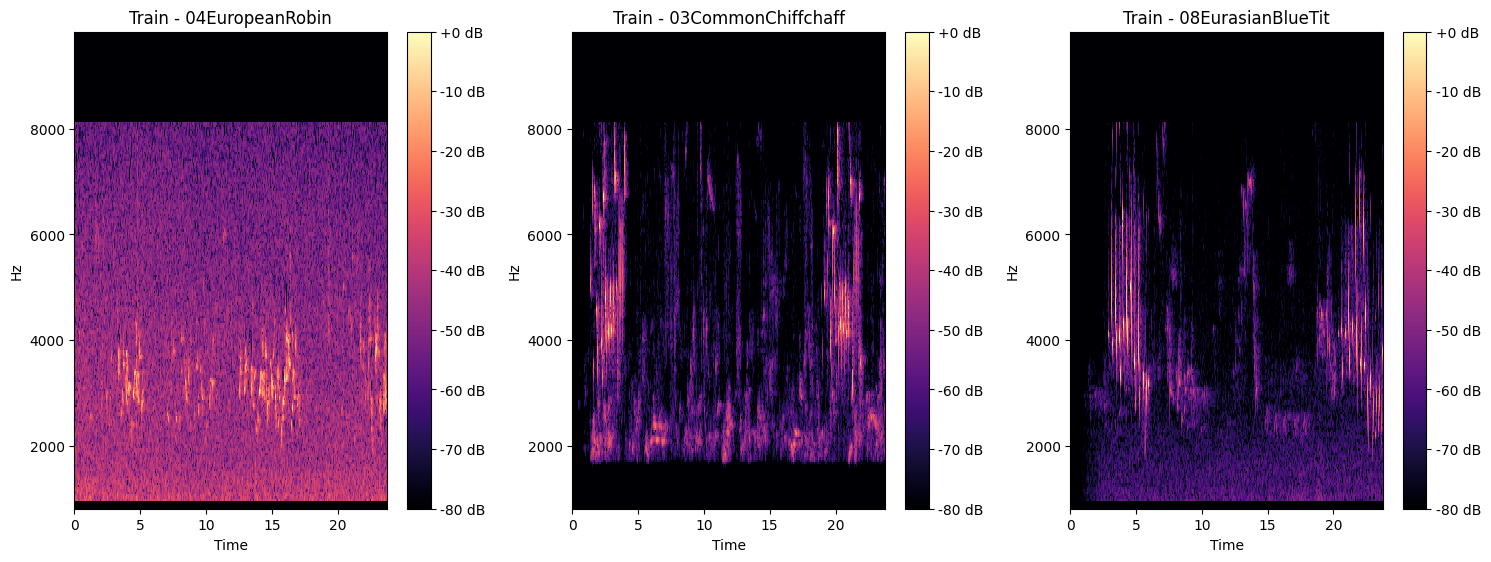

Validation set samples:


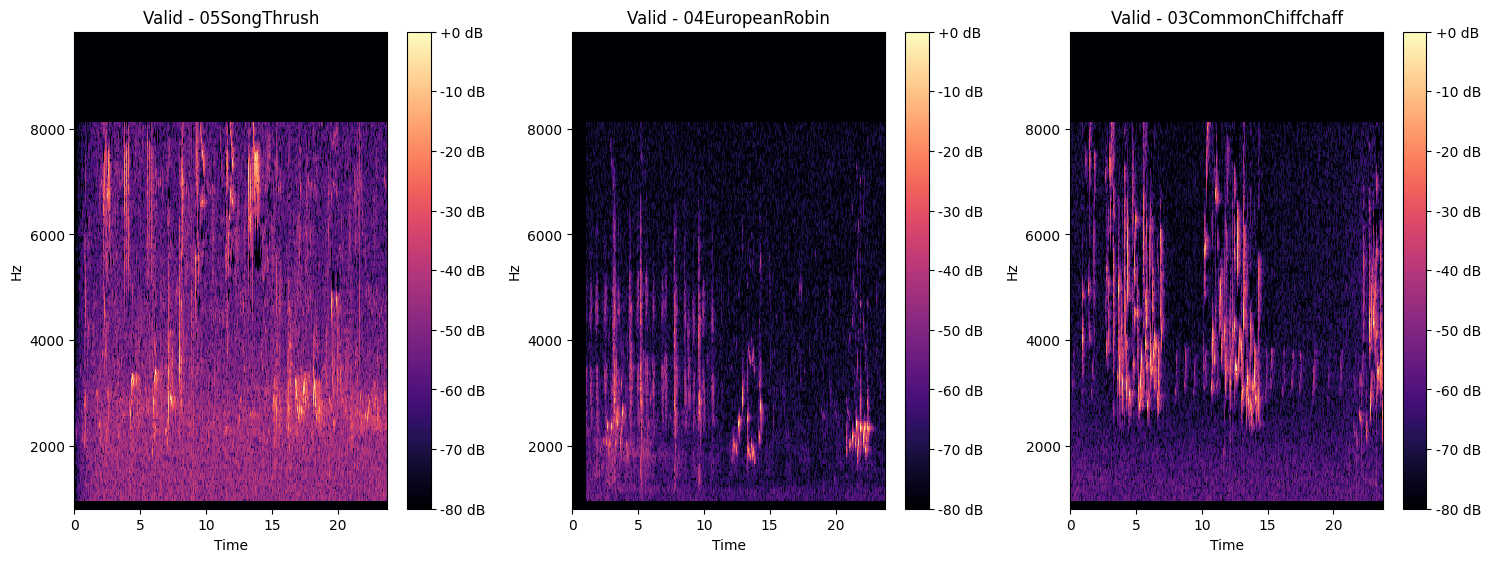

Test set samples:


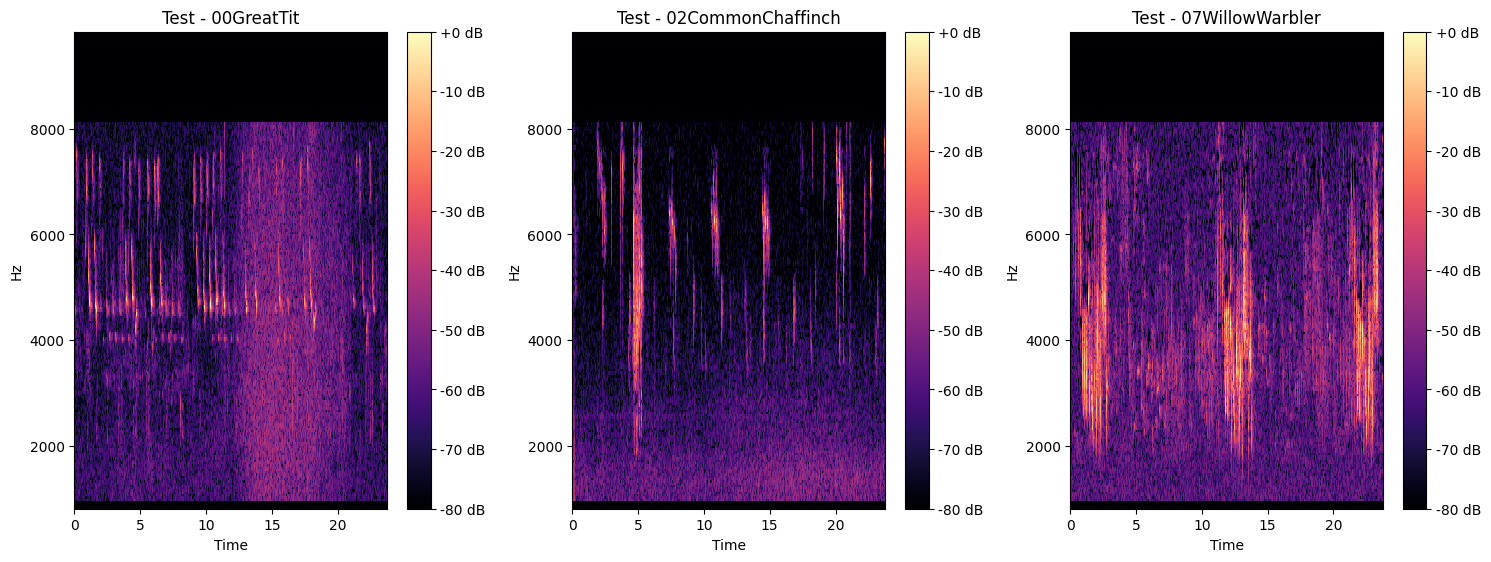

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

def pad_spectrogram(spectrogram, sr=44100, n_fft=1024, min_freq=1024, max_freq=8192):
    # Calculate the FFT frequencies
    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

    # Determine the indices for the minimum and maximum frequencies
    min_idx = np.argmax(freqs >= min_freq)
    max_idx = np.argmax(freqs > max_freq)

    # Calculate the range of the source frequency bins to be copied
    source_freq_range = max_idx - min_idx

    # Truncate the frequencies to the required range
    freqs = freqs[min_idx:max_idx]

    # Create a new padded spectrogram with 513 frequency bins
    padded_spectrogram = np.zeros((513, spectrogram.shape[1]))

    # Calculate the range of the target frequency bins
    target_min_idx = (min_freq / (sr / 2)) * (n_fft // 2)
    target_max_idx = target_min_idx + source_freq_range

    # Map the original spectrogram to the padded spectrogram
    pad_start_idx = int(np.floor(target_min_idx))
    pad_end_idx = int(np.ceil(target_max_idx))

    # Fill the padded spectrogram with the original data
    #print("padded_spectrogram[pad_start_idx:pad_end_idx, :].shape:"+str(padded_spectrogram[pad_start_idx:pad_end_idx, :].shape))
    #print("spectrogram.shape:"+str(spectrogram.shape))
    padded_spectrogram[pad_start_idx:pad_end_idx-2, :] = spectrogram

    return padded_spectrogram

def cut_off_freqs(spectrogram,min_freq,max_freq,frequencies):
  # Find the frequency bin indices for the desired range
     cutoffspec=spectrogram
     min_bin = np.argmax(frequencies >= min_freq)
     max_bin = np.argmax(frequencies > max_freq)
     cutoffspec[0][:min_bin, :]=0
     cutoffspec[0][max_bin:, :]=0
     return cutoffspec

# Function to visualize a batch of spectrograms
def visualize_spectrogram_batch(spectrograms, labels, title="Spectrograms", sr=44100, hop_length=512, fmin=1024, fmax=8192):
    plt.figure(figsize=(15, 16))
    for i in range(len(spectrograms)):
        plt.subplot(3, 3, i + 1)
        spectrogram = spectrograms[i].numpy()
        #spectrogram=
        label = label_encoder.inverse_transform([labels[i]])[0]
        frequencies = librosa.fft_frequencies(sr=sr, n_fft=1024)
        #spectrogram = cut_off_freqs(spectrogram,fmin,fmax,frequencies)
        librosa.display.specshow(librosa.power_to_db(pad_spectrogram(spectrogram[0]), ref=np.max), sr=sr, hop_length=hop_length,  fmin=fmin, fmax=fmax, x_axis='time',y_axis='linear')

        plt.colorbar(format='%+2.0f dB')
        plt.title(f'{title} - {label}')
        plt.tight_layout()
        plt.ylim(fmin*0.8,fmax*1.2)
    #print(plt.ylim())
    plt.show()

# Function to get a random batch of samples from a DataLoader
def get_random_batch(loader, num_samples=3):
    data_iter = iter(loader)
    spectrograms, labels = next(data_iter)
    return spectrograms[:num_samples], labels[:num_samples]

# Get random samples from train, validation, and test loaders
train_spectrograms, train_labels = get_random_batch(train_loader)
valid_spectrograms, valid_labels = get_random_batch(valid_loader)
test_spectrograms, test_labels = get_random_batch(test_loader)

# Visualize samples from each dataset
print("Training set samples:")
visualize_spectrogram_batch(train_spectrograms, train_labels, title="Train")

print("Validation set samples:")
visualize_spectrogram_batch(valid_spectrograms, valid_labels, title="Valid")

print("Test set samples:")
visualize_spectrogram_batch(test_spectrograms, test_labels, title="Test")

torch.Size([3, 1, 166, 1024])


## 5. **Select Model**

### Using a simple transformer

In [ ]:
import torch.nn as nn
import torch

class AudioTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads=8, num_layers=6, dropout=0.1, epsilon=1e-6):
        super(AudioTransformer, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.epsilon = epsilon
        self.model_type = 'Transformer'
        self.encoder = nn.Linear(input_dim, input_dim)
        self.pos_encoder = PositionalEncoding(input_dim, dropout)
        encoder_layers = nn.TransformerEncoderLayer(input_dim, num_heads, input_dim*2, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.norm = nn.LayerNorm(input_dim)  # Add normalization layer
        self.decoder = nn.Linear(input_dim, num_classes)

    def forward(self, src):
        if src.dim() == 4:  # Handle the case where the input has a channel dimension
            src = src.squeeze(1)  # Remove the channel dimension (batch_size, channels, input_dim, seq_length) -> (batch_size, input_dim, seq_length)

        # Replace NaNs and Infs with zeros
        src = torch.where(torch.isnan(src), torch.zeros_like(src), src)
        src = torch.where(torch.isinf(src), torch.zeros_like(src), src)

        # Scale the input
        mean = torch.mean(src, dim=[0, 1, 2], keepdim=True)
        std = torch.std(src, dim=[0, 1, 2], keepdim=True) + self.epsilon
        src = (src - mean) / std

        src = src.permute(2, 0, 1)  # (batch_size, input_dim, seq_length) -> (seq_length, batch_size, input_dim)
        src = self.encoder(src) * torch.sqrt(torch.tensor(self.input_dim, dtype=torch.float32))
        src = self.pos_encoder(src)
        src = self.transformer_encoder(src)
        src = self.norm(src)  # Apply normalization
        output = src.mean(dim=0)  # Aggregate sequence output
        output = self.decoder(output)
        return output

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.d_model = d_model

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

# Define the input dimension (number of Mel bands) and the number of classes
input_dim = 128  # This should match the number of Mel bands
num_classes = len(label_encoder.classes_)

# Initialize the model
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AudioTransformer(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Print summary of network and how many trainable parameters
print(model)
print(f"Number of trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


AudioTransformer(
  (encoder): Linear(in_features=128, out_features=128, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (decoder): Linear(in_features=128, out_features

### Using a simple CNN

In [ ]:
import torch.nn as nn
import torch
import torch.optim as optim

torch.cuda.empty_cache()
# Define a simpler CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes, input_dim=166):
        print("num_classes: "+str(num_classes))
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(0.5)
        conv_output_size = self._get_conv_output(input_dim, max_length)
        print("conv_output_size: "+str(conv_output_size))
        self.fc1 = nn.Linear(conv_output_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, input_dim, max_length):
        # Create a dummy tensor with the same shape as the input
        x = torch.zeros(1, 1, input_dim, max_length)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # Flatten the tensor
        return x.numel()


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        +print(f"Model output shape: {x.shape}")
        return x

# Initialize the model, loss function, and optimizer
num_classes = len(label_encoder.classes_)
model = SimpleCNN(num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# print summary of network and how many trainable parameters
print(model)
print(f"Number of trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

model.to(device) # need to move to GPU

num_classes: 10
conv_output_size: 327680
SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=327680, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Number of trainable parameters: 41967754


SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=327680, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### Improved CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
    def __init__(self, input_dim,max_length, num_classes):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=(3, 3), padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=(3, 3), padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=(3, 3), padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=(3, 3), padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.conv5 = nn.Conv2d(512, 1024, kernel_size=(3, 3), padding=1)
        self.bn5 = nn.BatchNorm2d(1024)
        self.dropout = nn.Dropout(0.5)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self._calculate_flatten_size(input_dim=input_dim,max_length=max_length)

        self.fc1 = nn.Linear(self.flatten_size, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def _calculate_flatten_size(self, input_dim, max_length):
        with torch.no_grad():
            print("max length: "+str(max_length))
            x = torch.zeros(1, 1, input_dim, max_length)
            x = F.relu(self.bn1(self.conv1(x)))
            x = F.max_pool2d(x, (2, 2))
            x = F.relu(self.bn2(self.conv2(x)))
            x = F.max_pool2d(x, (2, 2))
            x = F.relu(self.bn3(self.conv3(x)))
            x = F.max_pool2d(x, (2, 2))
            x = F.relu(self.bn4(self.conv4(x)))
            x = F.max_pool2d(x, (2, 2))
            x = F.relu(self.bn5(self.conv5(x)))
            x = self.global_avg_pool(x)
            self.flatten_size = x.view(1, -1).size(1)
            print("x numel:"+str(x.numel()))
            print("flatten size: "+str(self.flatten_size))

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Added an extra dropout layer
        x = self.fc2(x)
        return x

# Define the input dimension (number of Mel bands) and the number of classes
torch.cuda.empty_cache()
input_dim = 166  # This should match the number of Mel bands
num_classes = len(label_encoder.classes_)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = ImprovedCNN(input_dim=input_dim,max_length=max_length, num_classes=num_classes).to(device)
#model.to(xla.device())
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)

# Print summary of network and how many trainable parameters
print(model)
print(f"Number of trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
print(f"Expected memory usage (MB): {4*4 * sum(p.numel() for p in model.parameters() if p.requires_grad)/(1024**2)}")

max length: 2048
x numel:1024
flatten size: 1024
ImprovedCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=(1

### Resnet

In [ ]:
from torchvision.models import resnet34
import torch
import torch.nn as nn
import torch.optim as optim
if torch.cuda.is_available():
  device=torch.device('cuda:0')
else:
  device=torch.device('cpu')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model = resnet34(pretrained=True)
model.fc = nn.Linear(512,50)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model = model.to(device)
print(model)
print(f"Number of trainable parameters: {4 * sum(p.numel() for p in model.parameters() if p.requires_grad)}")
print(f"Expected memory usage: {4*4 * sum(p.numel() for p in model.parameters() if p.requires_grad)/(1024**2)}")

## Custom

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class SpectrogramNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SpectrogramNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(64, 128, stride=1)
        self.layer2 = self._make_layer(128, 256, stride=2)
        self.layer3 = self._make_layer(256, 512, stride=2)

        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=512, nhead=8),
            num_layers=6
        )

        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_channels, out_channels, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        layers.append(ResidualBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        # Flatten the output for the transformer
        b, c, h, w = x.shape
        x = x.view(b, c, h * w).permute(2, 0, 1)

        x = self.transformer(x)
        x = x.mean(dim=0)

        x = self.fc(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = len(label_encoder.classes_)
model = SpectrogramNet(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)

# Print summary of network and how many trainable parameters
print(model)
print(f"Number of trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

SpectrogramNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ResidualBlock(
      (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


## Show GPU Usage per batch

In [ ]:
## Test GPU Usage per batch

def get_gpu_memory_usage():
    return torch.cuda.memory_allocated() / 1024**2  # Convert bytes to megabytes

# Function to measure the memory usage of a batch
def measure_batch_memory_usage(data_loader, device, num_batches=5):
    initial_memory = get_gpu_memory_usage()
    print(f"Initial GPU memory usage: {initial_memory:.2f} MB")

    batch_memory_usages = []
    for i, (spectrograms, labels) in enumerate(data_loader):
        if i >= num_batches:
            break

        # Clear GPU memory
        torch.cuda.empty_cache()

        # Measure memory usage before loading the batch
        before_batch_memory = get_gpu_memory_usage()

        spectrograms, labels = spectrograms.to(device), labels.to(device)

        # Measure memory usage after loading the batch
        after_batch_memory = get_gpu_memory_usage()

        batch_memory_usage = after_batch_memory - before_batch_memory
        batch_memory_usages.append(batch_memory_usage)
        print(f"Batch {i+1} memory usage: {batch_memory_usage:.2f} MB")

        # Clear GPU memory after measuring
        torch.cuda.empty_cache()

    return batch_memory_usages

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Measure memory usage for the first 5 batches
batch_memory_usages = measure_batch_memory_usage(train_loader, device, num_batches=5)
print(f"Average memory usage per batch: {sum(batch_memory_usages)/len(batch_memory_usages):.2f} MB")

Initial GPU memory usage: 115.91 MB
Batch 1 memory usage: 10.38 MB
Batch 2 memory usage: 10.38 MB
Batch 3 memory usage: 10.38 MB
Batch 4 memory usage: 10.38 MB
Batch 5 memory usage: 10.38 MB
Average memory usage per batch: 10.38 MB


## 6. **Training**

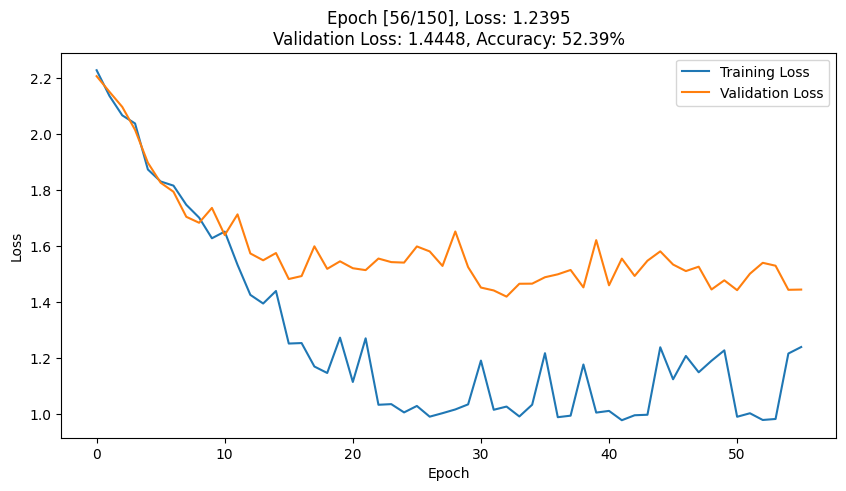

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from IPython.display import clear_output
from datetime import datetime
import pandas as pd



# Create a subfolder with the current date and time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
checkpoint_dir = f'/content/checkpoints/{current_time}'
os.makedirs(checkpoint_dir, exist_ok=True)

# Set parameters for early stopping
early_stopping_patience = 50
best_val_loss = float('inf')
patience_counter = 0

# Initialize learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# For plotting and saving metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

def check_for_nan(tensor, name="tensor"):
    if torch.isnan(tensor).any() or torch.isinf(tensor).any():
        print(f"NaN or Inf detected in {name}")

def save_checkpoint(state, is_best, filename):
    if is_best:
        torch.save(state, filename)
        print("Best model checkpoint saved!")

# Training loop
num_epochs = 150
max_norm = 1.0  # For gradient clipping

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for spectrograms, labels in tqdm(train_loader):
        spectrograms, labels = spectrograms.to(device), labels.to(device)

        # Debugging statements
        print(f"Epoch {epoch + 1}/{num_epochs}")
        #print(f"Spectrograms shape: {spectrograms.shape}")
        #print(f"Labels shape: {labels.shape}")


        # Forward pass
        outputs = model(spectrograms)

        # Debugging statements
        #print(f"Outputs shape: {outputs.shape}")

        loss = criterion(outputs, labels)

        # Debugging statements
        print(f"Loss value: {loss.item()}")

        # Check for NaNs/Infs
        #check_for_nan(spectrograms, "spectrograms")
        #check_for_nan(outputs, "outputs")
        #check_for_nan(loss, "loss")

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)

        optimizer.step()

        running_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for spectrograms, labels in valid_loader:
            spectrograms, labels = spectrograms.to(device), labels.to(device)


            # Forward pass
            outputs = model(spectrograms)
            loss = criterion(outputs, labels)

            # Check for NaNs/Infs
            #check_for_nan(spectrograms, "spectrograms (val)")
            #check_for_nan(outputs, "outputs (val)")
            #check_for_nan(loss, "loss (val)")

            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = val_loss / len(valid_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")

    # Step the scheduler
    scheduler.step(avg_val_loss)

    # Check for improvement
    is_best = avg_val_loss < best_val_loss
    if is_best:
        best_val_loss = avg_val_loss
        patience_counter = 0
        # Save the checkpoint
        checkpoint_path = os.path.join(checkpoint_dir, 'best_model.pth')
        save_checkpoint({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'loss': avg_val_loss,
        }, is_best, checkpoint_path)
    else:
        patience_counter += 1

    # Check early stopping condition
    if patience_counter >= early_stopping_patience:
        print("Early stopping triggered")
        break

    # Live plot of training and validation loss
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}\n" + f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")
    plt.show()

# Restore the best model weights
best_checkpoint = os.path.join(checkpoint_dir, 'best_model.pth')
checkpoint = torch.load(best_checkpoint)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
print("Restored best model weights from checkpoint")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot final training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
final_graph_path = os.path.join(checkpoint_dir, 'training_validation_loss.png')
plt.savefig(final_graph_path)
plt.show()

# Save the metrics history to a CSV file
metrics_df = pd.DataFrame({
    'epoch': range(1, len(train_losses) + 1),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_accuracy': train_accuracies,
    'val_accuracy': val_accuracies
})
metrics_csv_path = os.path.join(checkpoint_dir, 'training_metrics.csv')
metrics_df.to_csv(metrics_csv_path, index=False)
print(f"Saved training metrics to {metrics_csv_path}")

In [ ]:
torch.cuda.clear_cache

In [ ]:
# Prepare the test DataLoader
test_size = int(0.2 * len(dataset))
train_size = len(dataset) - test_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Extend the testing function
def test_model(model, test_loader, criterion, num_samples=5):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    predictions = []
    true_labels = []
    spectrogram_samples = []

    with torch.no_grad():
        for spectrograms, labels in test_loader:
            spectrograms, labels = spectrograms.to(device), labels.to(device)

            outputs = model(spectrograms)
            #print(f"outputs: {outputs} labels: {labels}")

            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Collect samples for visualization
            if len(predictions) < num_samples:
                predictions.extend(predicted.cpu().numpy())
                true_labels.extend(labels.cpu().numpy())
                spectrogram_samples.extend(spectrograms.cpu().numpy())

    test_loss /= len(test_loader)
    accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%')
    return test_loss, accuracy, spectrogram_samples[:num_samples], true_labels[:num_samples], predictions[:num_samples]

# Visualization function for predictions
def visualize_predictions(spectrograms, true_labels, predicted_labels, label_encoder):
    num_samples = len(spectrograms)
    plt.figure(figsize=(15, num_samples * 3))
    for i in range(num_samples):
        plt.subplot(num_samples, 1, i + 1)
        spectrogram = spectrograms[i][0]
        true_label = label_encoder.inverse_transform([true_labels[i]])[0]
        predicted_label = label_encoder.inverse_transform([predicted_labels[i]])[0]
        librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=16000, hop_length=160, y_axis='mel', fmax=8000, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'True: {true_label}, Predicted: {predicted_label}')
        plt.tight_layout()
    plt.show()

# Test the model and get sample predictions
test_loss, test_accuracy, spectrogram_samples, true_labels, predictions = test_model(model, test_loader, criterion)

# Visualize the predictions
visualize_predictions(spectrogram_samples, true_labels, predictions, label_encoder)

KeyboardInterrupt: 

In [ ]:
import shutil
from google.colab import drive
from google.colab import runtime

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the checkpoints directory and the zip file
checkpoint_dir = '/content/checkpoints'
zip_file_path = '/content/drive/MyDrive/bird_checkpoints.zip'

# Create a zip file of the checkpoints directory
shutil.make_archive('/content/checkpoints', 'zip', checkpoint_dir)

# Move the zip file to Google Drive
shutil.move('/content/checkpoints.zip', zip_file_path)

# Verify the file has been copied
print(f"Checkpoints saved to {zip_file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checkpoints saved to /content/drive/MyDrive/bird_checkpoints.zip


In [ ]:
shutil.copytree("/content/checkpoints/20240813-132959", "/content/drive/MyDrive/best_models/20240813-132959")

'/content/drive/MyDrive/best_models/20240813-132959'

In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
SAMPLE_RATE=44100
N_FFT=1024
RELEVANT_MIN_FREQ=1024
RELEVANT_MAX_FREQ=8192
def filter_spectrogram_files(input_directory, output_directory, sample_rate=SAMPLE_RATE, n_fft=N_FFT, min_freq=RELEVANT_MIN_FREQ, max_freq=RELEVANT_MAX_FREQ):
    min_bin, max_bin = calculate_relevant_bins(sample_rate, n_fft, min_freq, max_freq)

    for root, dirs, files in os.walk(input_directory):
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            target_dir_path = os.path.join(output_directory, dir)
            os.makedirs(target_dir_path, exist_ok=True)

            for file in tqdm(os.listdir(dir_path), desc=f"Processing {dir}"):
                if file.endswith('.pt'):
                    file_path = os.path.join(dir_path, file)
                    spectrogram = torch.load(file_path)

                    # Keep only the relevant frequency bins
                    filtered_spectrogram = spectrogram[:, min_bin:max_bin, :]

                    # Save the filtered spectrogram
                    output_path = os.path.join(target_dir_path, file)
                    torch.save(filtered_spectrogram, output_path)

# Example usage
input_directory = "/content/drive/MyDrive/spectrograms/"  # Change this to your directory with .pt files
output_directory = "/content/drive/MyDrive/Filtered_spectrograms/"  # Change this to your desired output directory

filter_spectrogram_files(input_directory, output_directory)

Processing 09EurasianWren: 100%|██████████| 168/168 [04:43<00:00,  1.69s/it]
Processing .ipynb_checkpoints: 0it [00:00, ?it/s]
